U.S BUREAU OF LABOR STATISTICS "https://data.bls.gov/cgi-bin/surveymost?bls"

In [1]:
import pandas as pd 
import matplotlib as plt 
import numpy as np 
import bls 

In [25]:
wages = bls.get_series('CIU2020000000000A')
wages

date
2004Q1    2.6
2004Q2    2.7
2004Q3    2.6
2004Q4    2.6
2005Q1    2.7
         ... 
2022Q1    5.0
2022Q2    5.7
2022Q3    5.2
2022Q4    5.1
2023Q1    5.1
Freq: Q-DEC, Name: CIU2020000000000A, Length: 77, dtype: float64

In [3]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('cpi_data.csv')
cpi_data = pd.read_csv('cpi_data.csv')
cpi_data

,date,CUUR0000SA0
0,2004-01,185.200
1,2004-02,186.200
2,2004-03,187.400
3,2004-04,188.000
4,2004-05,189.100
...,...,...
227,2022-12,296.797
228,2023-01,299.170
229,2023-02,300.840
230,2023-03,301.836


In [5]:
cpi_data.columns = 'Date','CPI'
cpi_data

,Date,CPI
0,2004-01,185.200
1,2004-02,186.200
2,2004-03,187.400
3,2004-04,188.000
4,2004-05,189.100
...,...,...
227,2022-12,296.797
228,2023-01,299.170
229,2023-02,300.840
230,2023-03,301.836


we’are going to converte the CPI data to quarterly increments and cleaned up the date format to match the wages data

In [15]:
cpi_data['Date'] = cpi_data['Date'].str.replace('-03','Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06','Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09','Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12','Q4')

In [17]:
cpi_data['Date']

0      2004-01
1      2004-02
2       2004Q1
3      2004-04
4      2004-05
        ...   
227     2022Q4
228    2023-01
229    2023-02
230     2023Q1
231    2023-04
Name: Date, Length: 232, dtype: object

In [26]:
newcpi_data = cpi_data [(cpi_data.Date.str.contains('-')== False)] 
newcpi_data

,Date,CPI
2,2004Q1,187.400
5,2004Q2,189.700
8,2004Q3,189.900
11,2004Q4,190.300
14,2005Q1,193.300
...,...,...
218,2022Q1,287.504
221,2022Q2,296.311
224,2022Q3,296.808
227,2022Q4,296.797


In [27]:
newcpi_data.to_csv('cpi_clean.csv')

Let's go back work on the wages data

In [45]:
wages
wages.to_csv('bls_wages_data_csv')

In [32]:
wages.to_csv('bls_wages_data_csv')
bls_wages_data = pd.read_csv('bls_wages_data_csv')
bls_wages_data

,date,CIU2020000000000A
0,2004Q1,2.6
1,2004Q2,2.7
2,2004Q3,2.6
3,2004Q4,2.6
4,2005Q1,2.7
...,...,...
72,2022Q1,5.0
73,2022Q2,5.7
74,2022Q3,5.2
75,2022Q4,5.1


In [41]:
bls_wages_data.columns = 'Date','Wages'
bls_wages_data

,Date,Wages
0,2004Q1,2.6
1,2004Q2,2.7
2,2004Q3,2.6
3,2004Q4,2.6
4,2005Q1,2.7
...,...,...
72,2022Q1,5.0
73,2022Q2,5.7
74,2022Q3,5.2
75,2022Q4,5.1


In [42]:
bls_wages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    77 non-null     object 
 1   Wages   77 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [43]:
new_bls_wages_data = bls_wages_data

To convert those percentages to match the CPI values, I’m going to create a function. I’ll feed the function the starting (2004 Q1) CPI value of 185.2. That’ll be my baseline. I’ll give that variable the name newnum.

For each iteration the function will make through the rows of my wages data series, I’ll divide the current wage value (x) by 400. 100 simply converts the percentage (3.5, etc.) to a decimal (0.035). And the four will reduce the annual rate (12 months) to a quarterly rate (3 months).

To convert that to a usable number, I’ll multiply it by the current value of newnum and then add newnum to the product. That should give us an approximation of the original CPI value adjusted by the related wage-growth percentage.

But, of course, this won’t be a number that has any direct equivalent in the real world. Instead, it is, as I said, an arbitrary approximation of what that number might have been. But, again, I think it’ll be close enough for our purposes.

Take a couple of minutes and read through the function. global newnum declares the variable as global. This makes it possible for me to replace the original value of newnum with the function’s output so the percentage in the next row will be adjusted by the updated value. Note also how any strings (str) will be ignored. And, finally, note how the updated data series will populate the newwages_data variable.


In [52]:
newnum = 185.2
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum
        return newnum
    else:
        return
newwages_data = new_bls_wages_data.applymap(process_wages)

In [54]:
newwages_data

,Date,Wages
0,2004Q1,186.403800
1,2004Q2,187.662026
2,2004Q3,188.881829
3,2004Q4,190.109561
4,2005Q1,191.392800
...,...,...
72,2022Q1,293.784217
73,2022Q2,297.970643
74,2022Q3,301.844261
75,2022Q4,305.692775


In [56]:
merged_data = pd.merge(newcpi_data, newwages_data, on='Date')
merged_data


,Date,CPI,Wages
0,2004Q1,187.400,186.403800
1,2004Q2,189.700,187.662026
2,2004Q3,189.900,188.881829
3,2004Q4,190.300,190.109561
4,2005Q1,193.300,191.392800
...,...,...,...
72,2022Q1,287.504,293.784217
73,2022Q2,296.311,297.970643
74,2022Q3,296.808,301.844261
75,2022Q4,296.797,305.692775


Text(0.5, 0, 'Dates')

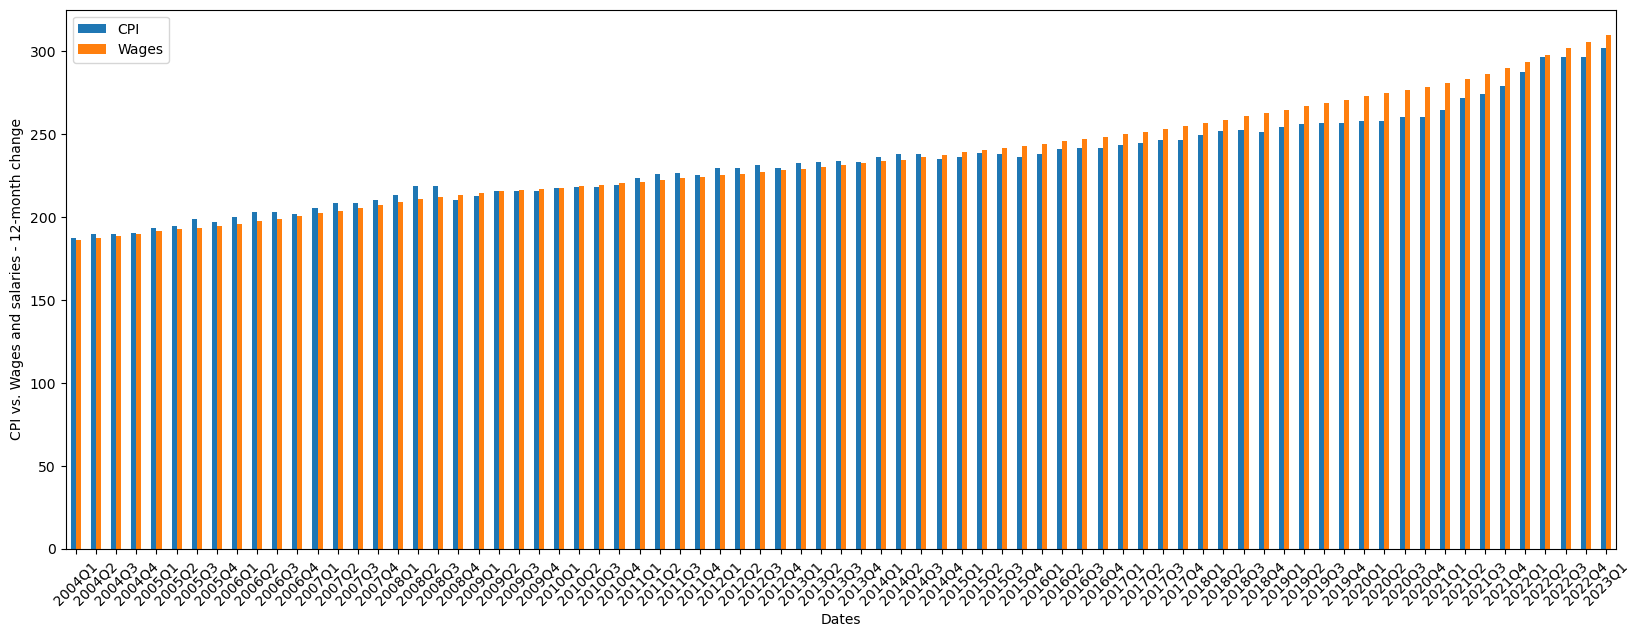

In [60]:
ax = merged_data.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')

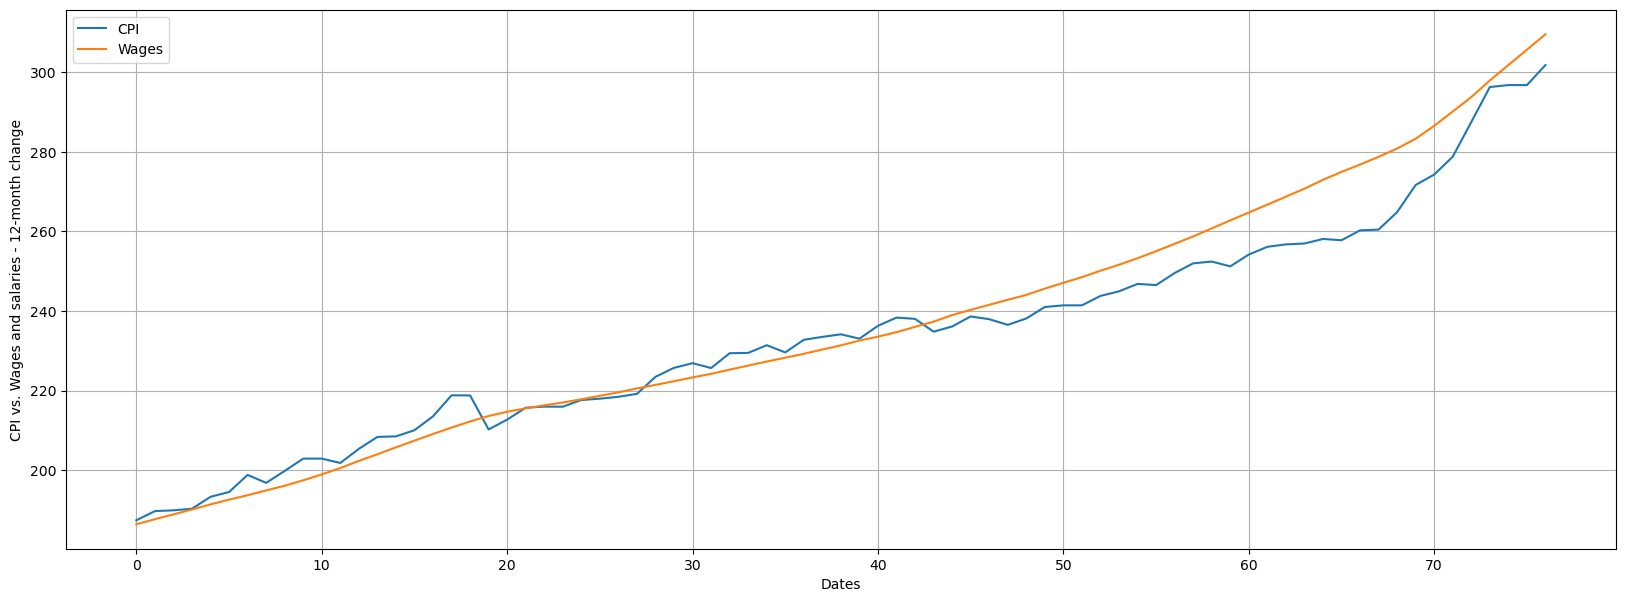

In [63]:
ax = merged_data.plot(kind='line', figsize=(20, 7))
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')
ax.grid()

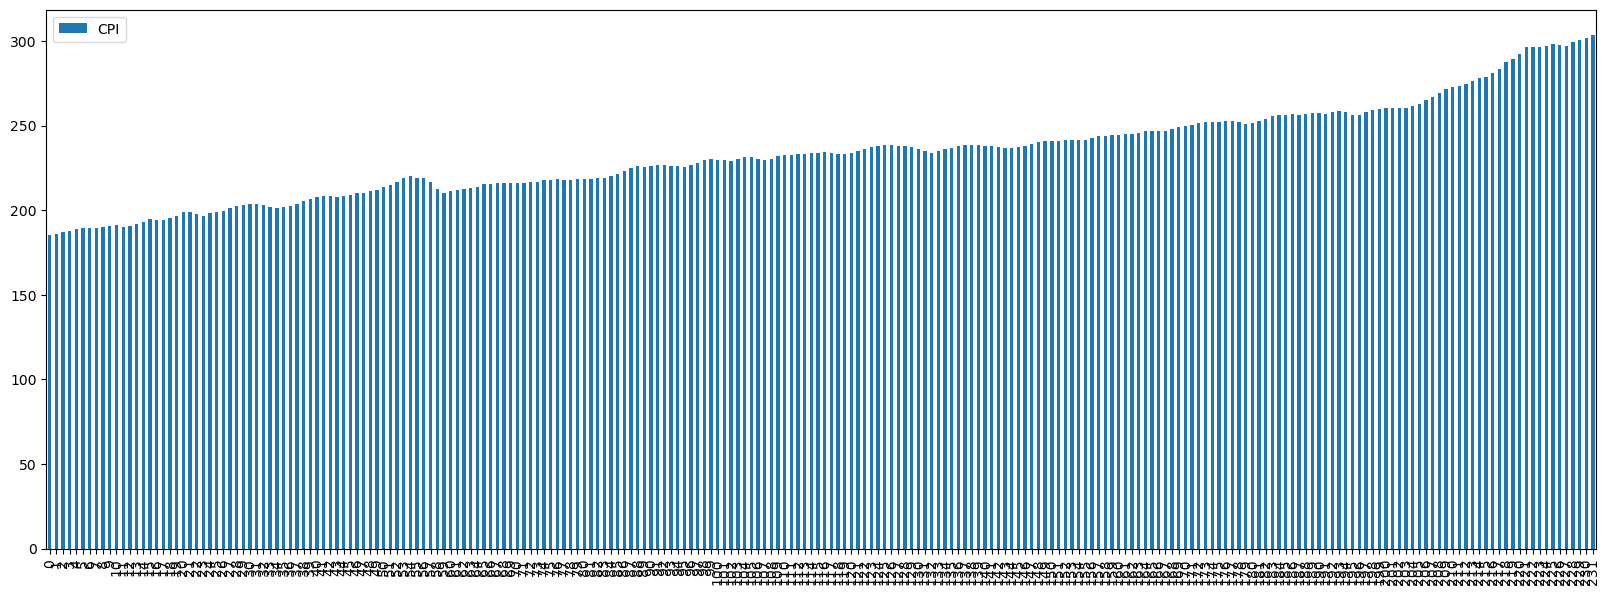

In [66]:
ax = cpi_data.plot(kind='bar', figsize=(20, 7))

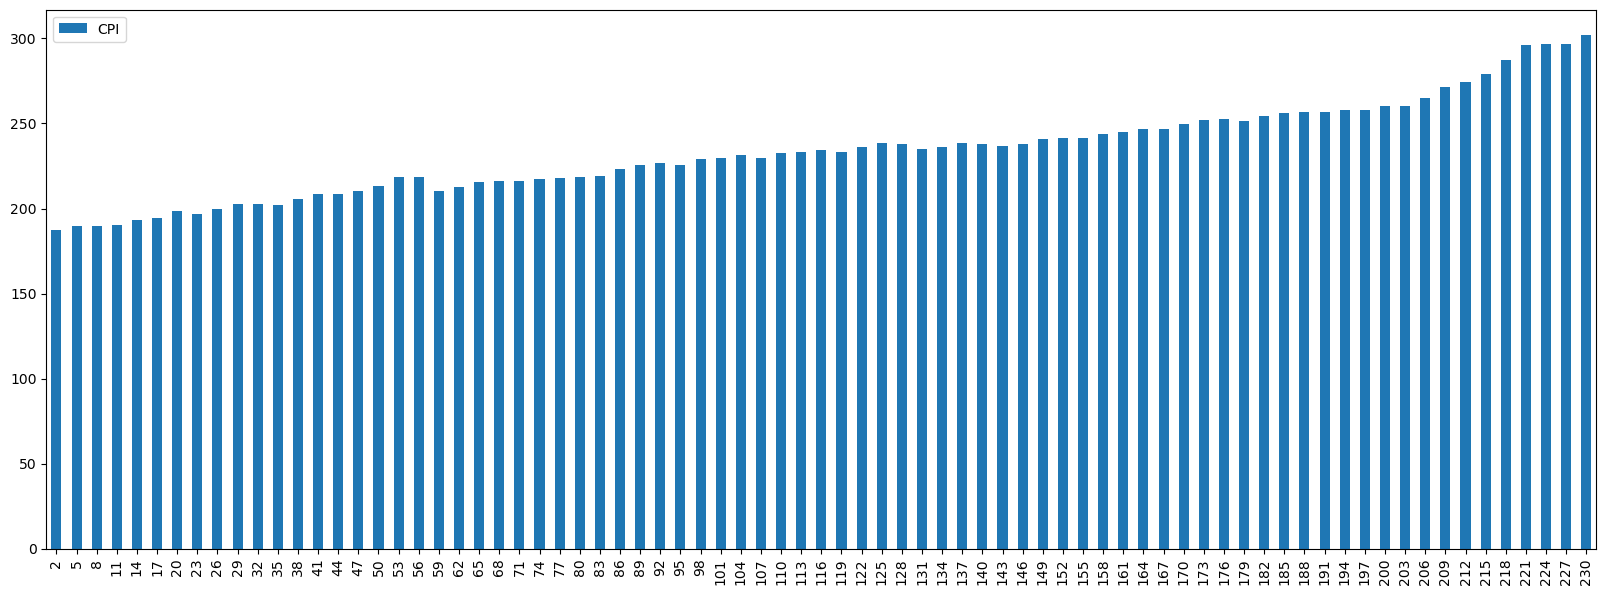

In [67]:
ax = newcpi_data.plot(kind='bar', figsize=(20,7))

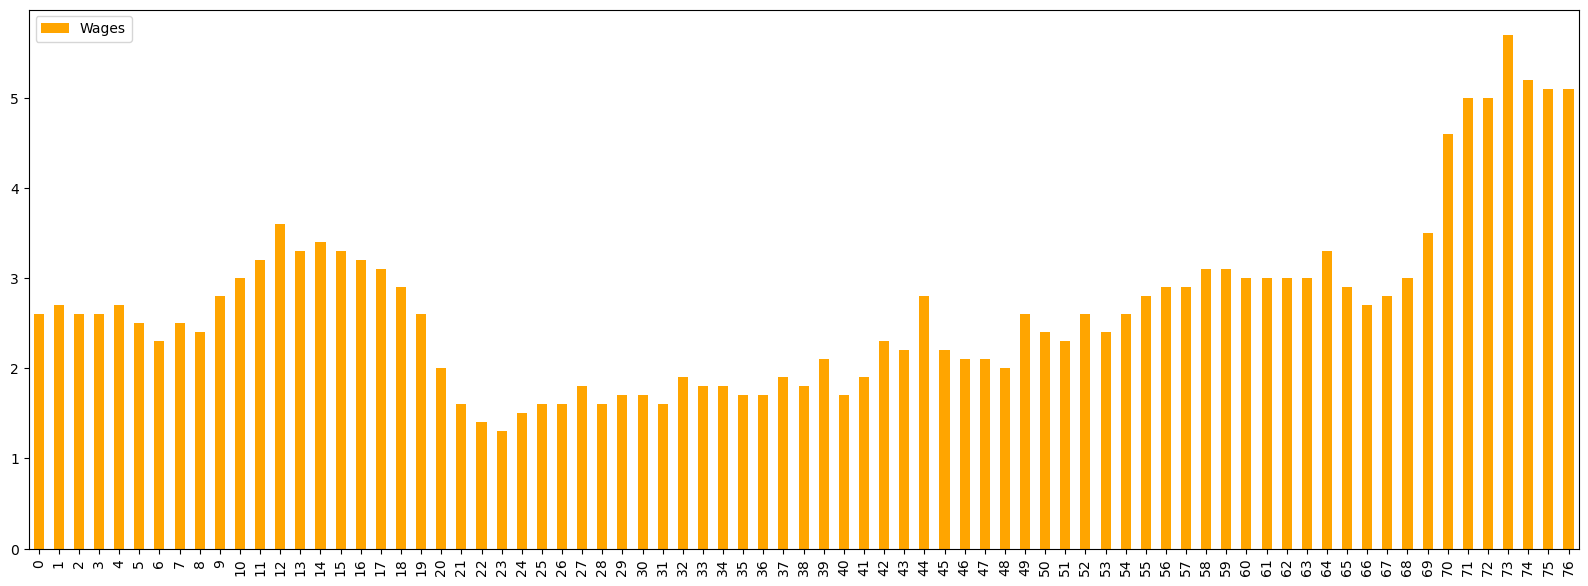

In [76]:
ax = bls_wages_data.plot(kind ='bar', color='orange', figsize=(20,7))

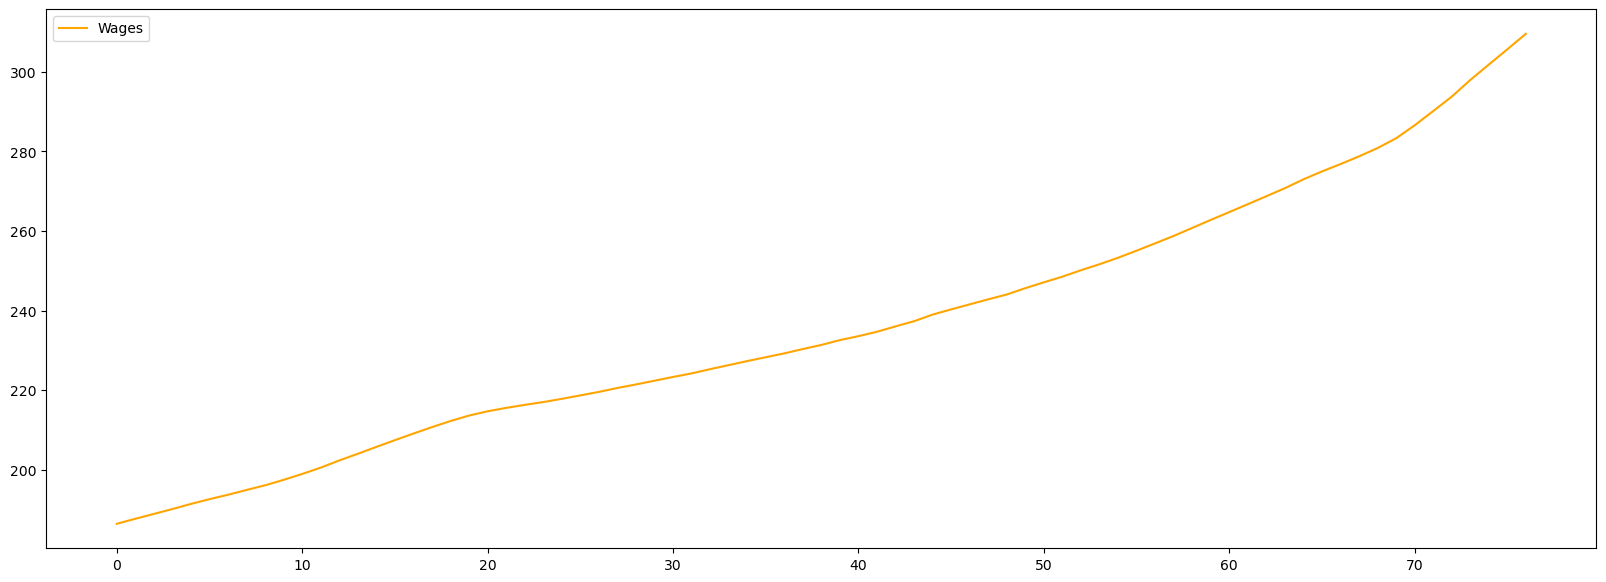

In [75]:
ax = newwages_data.plot(kind='line', color='orange', figsize=(20,7))